# Product search and query

<div>
    <img style='width: 220px;height: 100px;float: left;' src="./Supplementary_data/EODC-Logo-Final.png" height='100px' width='220px'/>
    <img style='width: 200px;height: 100px;float: left;' src="./Supplementary_data/BMNT_DE_Logo_dreizeilig_srgb.svg" height='100px' width='200px'/> 
    <img style='width: 200px;height: 100px;float: left;' src="./Supplementary_data/bmlv.svg" height='100px' width='200px'/>
    <img style='width: 200px;height: 100px;float: left;' src="./Supplementary_data/LOGO_TUW_GEO.png" height='100px' width='200px'/>
    <img style='width: 100px;height: 100px;float: left;' src="./Supplementary_data/Boku-wien.svg" height='100px' width='100px'/>
    <img style='width: 150px;height: 100px;float: right;' src="./Supplementary_data/ADC_Logo_final_transparent.png" height='100px' width='150px'/>
</div>

This notebok shows how to explore products and query for datasets in ACube. Currently the ACube hosts Sentinel 1 and Sentinel 2 high level products, as well as EUDEM_v1.1 that may be used for further processing and analysis. Additionally it is shown how to plot the queried datasets and how to download the data.

## Exploring products

The first step is to import the datacube package and initialize the application. The `app` parameter is an optional name to discern different applications.

In [1]:
import datacube
acube = datacube.Datacube(app='sample_1', env='acube')

To list the products we call the `acube.list_products()` method which lists the products in a table. The `dropna(axis=1)` shows only filled columns. The columns are:

* `name` - shows the name of the product. This field is used for querying the products
* `description` - Shows a short description of the product. Not fully shown for display purposes
* `format` - Format in which the data are stored
* `instrument` - Instrument used in capturing the product
* `platform` - Satelite platform used in capturing the product
* `resolution` - Spatial resolution of the product

```python
import pandas as pd
pd.set_option('display.max_colwidth', -1)
```

In [2]:
acube.list_products().dropna(axis=1)

name                                        description  \
id                                                                            
16          B_Sentinel_2         Atmospherically corrected Sentinel 2 bands   
19  CLOUDMASK_Sentinel_2            Cloud mask and buffer derived from SCL.   
21      FAPAR_Sentinel_2    Fraction of Photosynthetically Active Radiation   
24     FCOVER_Sentinel_2                       Fraction of vegetation cover   
18        GMR_Sentinel_1  Backscatter from a unit ground area projected ...   
26        LAI_Sentinel_2                                    Leaf Area Index   
28         MB_Sentinel_2  Monthly composite atmospherically corrected Se...   
17     MFAPAR_Sentinel_2                            Monthly composite FAPAR   
20    MFCOVER_Sentinel_2                           Monthly composite FCOVER   
22       MLAI_Sentinel_2                              Monthly composite LAI   
25       MTCI_Sentinel_2                 Monthly composite True Color Image   
27        SCL_Sentinel_2                         Scene Classification Layer   
23       SIG0_Sentinel_1  Backscatter returned to the satellites antenna...   
29        TCI_Sentinel_2                                   True Color Image   

         product_type    platform instrument   format  \
id                                                      
16          BOKU_B_S2  Sentinel-2        MSI  GeoTIFF   
19  BOKU_CLOUDMASK_S2  Sentinel-2        MSI  GeoTIFF   
21      BOKU_FAPAR_S2  Sentinel-2        MSI  GeoTIFF   
24     BOKU_FCOVER_S2  Sentinel-2        MSI  GeoTIFF   
18         TUW_GMR_S1  Sentinel-1        SAR  GeoTIFF   
26        BOKU_LAI_S2  Sentinel-2        MSI  GeoTIFF   
28         BOKU_MB_S2  Sentinel-2        MSI  GeoTIFF   
17     BOKU_MFAPAR_S2  Sentinel-2        MSI  GeoTIFF   
20    BOKU_MFCOVER_S2  Sentinel-2        MSI  GeoTIFF   
22       BOKU_MLAI_S2  Sentinel-2        MSI  GeoTIFF   
25       BOKU_MTCI_S2  Sentinel-2        MSI  GeoTIFF   
27        BOKU_SCL_S2  Sentinel-2        MSI  GeoTIFF   
23        TUW_SIG0_S1  Sentinel-1        SAR  GeoTIFF   
29        BOKU_TCI_S2  Sentinel-2        MSI  GeoTIFF   

                                                  crs resolution  \
id                                                                 
16  PROJCS["unnamed",GEOGCS["WGS 84",DATUM["WGS_19...  (-10, 10)   
19  PROJCS["unnamed",GEOGCS["WGS 84",DATUM["WGS_19...  (-10, 10)   
21  PROJCS["unnamed",GEOGCS["WGS 84",DATUM["WGS_19...  (-10, 10)   
24  PROJCS["unnamed",GEOGCS["WGS 84",DATUM["WGS_19...  (-10, 10)   
18  PROJCS["Azimuthal_Equidistant",GEOGCS["WGS 84"...  (-10, 10)   
26  PROJCS["unnamed",GEOGCS["WGS 84",DATUM["WGS_19...  (-10, 10)   
28  PROJCS["unnamed",GEOGCS["WGS 84",DATUM["WGS_19...  (-10, 10)   
17  PROJCS["unnamed",GEOGCS["WGS 84",DATUM["WGS_19...  (-10, 10)   
20  PROJCS["unnamed",GEOGCS["WGS 84",DATUM["WGS_19...  (-10, 10)   
22  PROJCS["unnamed",GEOGCS["WGS 84",DATUM["WGS_19...  (-10, 10)   
25  PROJCS["unnamed",GEOGCS["WGS 84",DATUM["WGS_19...  (-10, 10)   
27  PROJCS["unnamed",GEOGCS["WGS 84",DATUM["WGS_19...  (-10, 10)   
23  PROJCS["Azimuthal_Equidistant",GEOGCS["WGS 84"...  (-10, 10)   
29  PROJCS["unnamed",GEOGCS["WGS 84",DATUM["WGS_19...  (-10, 10)   

   spatial_dimensions  
id                     
16             (y, x)  
19             (y, x)  
21             (y, x)  
24             (y, x)  
18             (y, x)  
26             (y, x)  
28             (y, x)  
17             (y, x)  
20             (y, x)  
22             (y, x)  
25             (y, x)  
27             (y, x)  
23             (y, x)  
29             (y, x)

## Querying datasets and visualizing

To assist in selecting the area we can use `acube_functions` `interactive_plot()` function that draws a map we can use for querying. Simply zoom in on interested area and use the axis in combination with the next code cell.

In [3]:
from acube_functions import interactive_map
interactive_map()

Loading BokehJS ...

Below we specify a `query_product` variable and `query_spatiotemporal` dictionary with spatial parameters for Vienna during the summer of 2017. These variables can be adapted to select a different spatial and temporal range, and a different product.

In [4]:
query_product = 'MTCI_Sentinel_2'
query_spatiotemporal = {
    'lon': (16.35, 16.45),
    'lat': (48.2, 48.3),
    'time': ('2017-05-01', '2017-09-30')
}

To load the data we use `acube.load()` with following parameters:

1. `product` to specify desired product

2. `output_crs` to specify desired coordinate reference frame

3. `resolution` to specify the spatial resolution

4. `**vienna_summer` is the desired spatiotemporal area

Data is loaded into memory in an `xarray.Dataset`

In [5]:
data = acube.load(product=query_product, output_crs='EPSG:32633', resolution=(-10, 10), **query_spatiotemporal)
data

<xarray.Dataset>
Dimensions:      (time: 5, x: 764, y: 1126)
Coordinates:
  * time         (time) datetime64[ns] 2017-05-16 ... 2017-09-15T12:00:00
  * y            (y) float64 5.351e+06 5.351e+06 ... 5.339e+06 5.339e+06
  * x            (x) float64 6.001e+05 6.001e+05 ... 6.077e+05 6.077e+05
    spatial_ref  int32 32633
Data variables:
    B02          (time, y, x) uint8 89 94 113 117 149 132 ... 122 89 43 42 47 39
    B03          (time, y, x) uint8 89 90 112 119 152 119 ... 106 57 55 64 54
    B04          (time, y, x) uint8 74 88 94 107 129 99 77 ... 92 76 39 39 46 37
Attributes:
    crs:           EPSG:32633
    grid_mapping:  spatial_ref

For plotting we import the `plot` function from `acube_functions` and call it on the desired data. `%matplotlib inline` is necessary for output to be visible inside the notebook. Tutorials on `matplotlib` can be found at https://matplotlib.org/tutorials/index.html

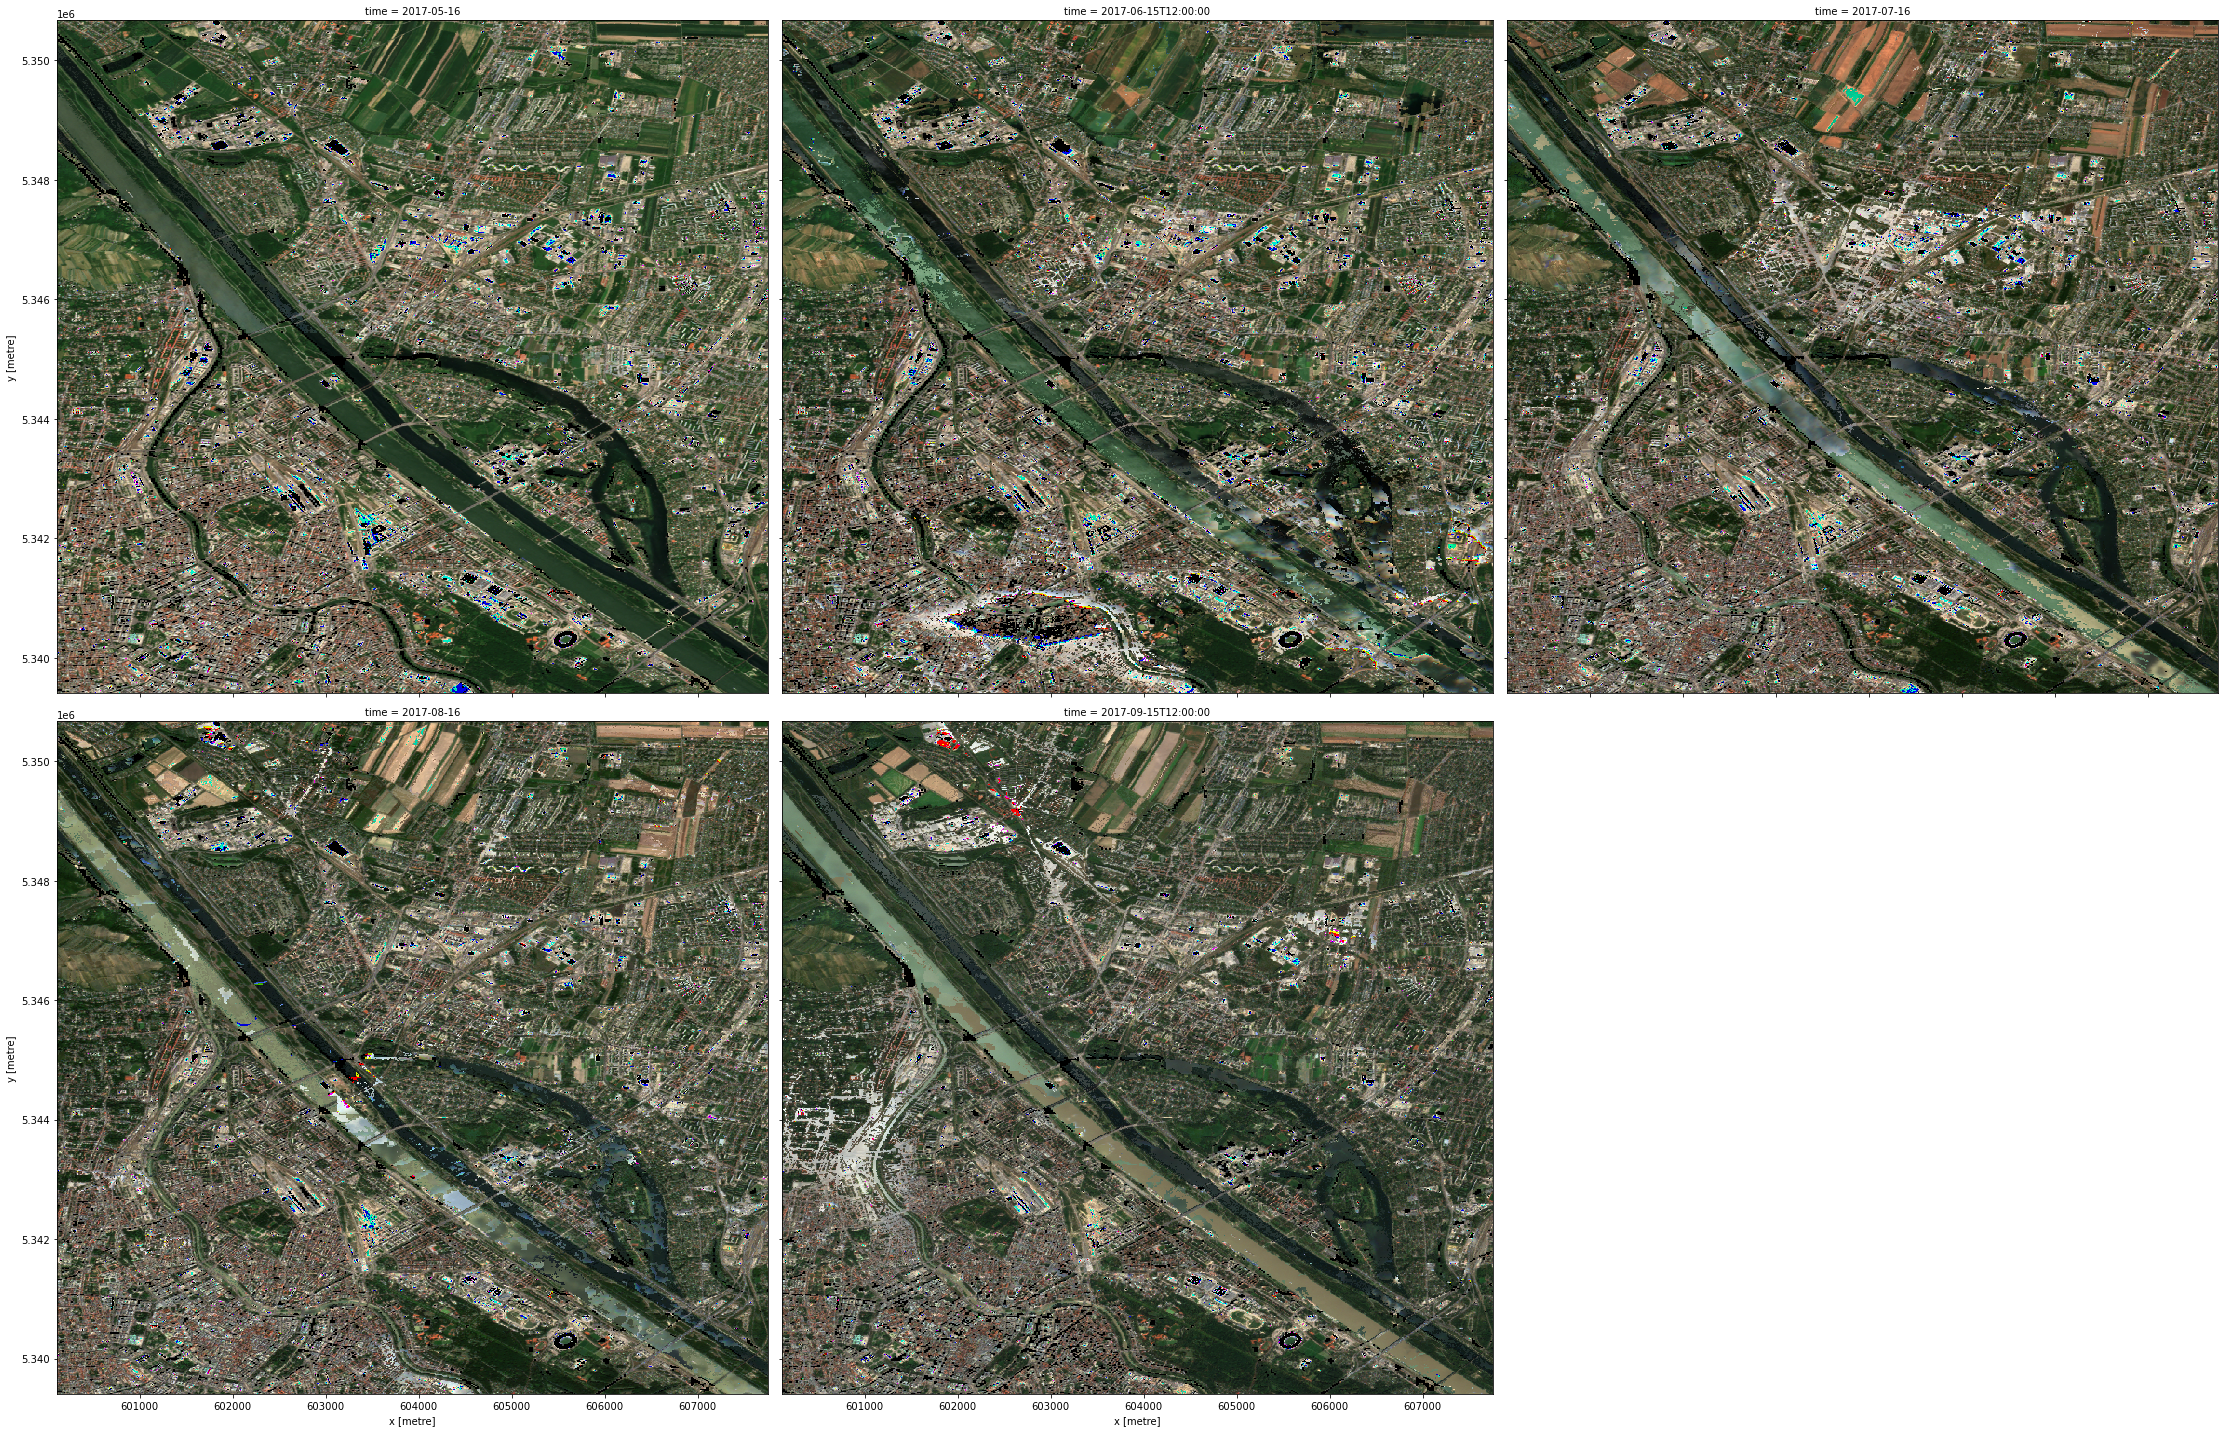

In [6]:
from acube_functions import plot
%matplotlib inline
plot(data)

## Downloading data

To download a certain timeslice in geotiff we can use the `datacube.utils.cog.write_cog` function. By using the `data.isel()` we select the zero indexed time slice which corresponds to the first time slice in the dataset which is the monthly composite for May. We also specify the file name.

In [7]:
from datacube.utils.cog import write_cog
write_cog(data.isel(time=0).to_array(), 'MTCI_MAY.tif')

PosixPath('MTCI_MAY.tif')